# データ分析
ここでは岐阜県産業総合センターにて，軸受寿命加速試験測定のデータを利用して，異常な値かどうかを推測する方法について説明します．

### データ分析の簡単な流れ

このシートでのデータ分析は，次のような流れで分析を行います．
1. データの読み込み
2. データの可視化
3. データ分析

### ライブラリの読み込み

まずは，ライブラリの読み込みを行います．それぞれのライブラリは次のような意味があります．
- *numpy* : 多次元配列を扱う
- *matplotlib* : グラフ描画用
- *japanize_matplotlib* : matplotlibの日本語化
- *pandas* : データ入出力ライブラリ

as の後ろは，各ライブラリのこのプログラム内での別名になります．import numpy as np と書かれていたら，以後 numpy は np という名前で呼ばれることになります．

In [2]:
!pip install numpy
!pip install matplotlib
!pip install japanize_matplotlib
!pip install pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import matplotlib.colors
import matplotlib.animation
import japanize_matplotlib
import pandas as pd

## データの読み込み

CSVファイルのデータ "Test6_Bearing_Inspection.csv" を * pandas * を使って読み込みます．pandas に含まれる read_csv 関数を使います．

In [2]:
df = pd.read_csv('Test6_Bearing_Inspection.csv')

読み込んだデータの中身は df という変数の中に入っています．これを出力するには次のように，変数名だけを入力します．

In [3]:
df

,Japan_time(unix epoch),Elapsed time(hours),0.acc_pp(m/s2),0.acc_avr(m/s2),0.acc_rms(m/s2),0.acc_cf(a.u.),0.vel_pp(mm/s),0.vel_avr(mm/s),0.vel_rms(mm/s),0.vel_cf(a.u.),...,0.envlp_alert,0.alert_lvl,1.acc_alert,1.vel_alert,1.envlp_alert,1.alert_lvl,2.acc_alert,2.vel_alert,2.envlp_alert,2.alert_lvl
0,1.639456e+09,0.000000,27.649283,1.509838,2.033136,2.719865,7.064129,1.196842,1.429350,0.988439,...,0,0,0,0,0,0,0,0,0,0
1,1.639457e+09,0.433370,18.053563,1.640122,2.059756,1.752981,2.976093,0.377689,0.469569,1.267585,...,0,1,0,0,0,1,0,0,0,1
2,1.639458e+09,0.666996,589.094513,3.270176,9.722214,12.118526,16.320402,0.607157,0.876595,3.723590,...,0,1,0,0,0,1,0,0,0,1
3,1.639459e+09,1.000294,24.034338,1.936883,2.452175,1.960247,2.883481,0.355780,0.439763,1.311380,...,0,1,0,0,0,1,0,0,0,1
4,1.639460e+09,1.333486,25.224870,1.777208,2.250248,2.241964,2.877742,0.348265,0.434328,1.325146,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,1.641360e+09,529.008828,27.897819,2.237897,2.835641,1.967655,4.010345,0.520848,0.655807,1.223027,...,0,0,0,0,0,0,0,0,0,0
1588,1.641361e+09,529.342283,3.132817,0.270295,0.363549,1.723465,1.012518,0.120055,0.152458,1.328262,...,0,0,0,0,0,0,0,0,0,0
1589,1.641362e+09,529.675458,1848.945789,61.840183,116.904847,3.163164,618.502543,66.861891,92.319903,1.339912,...,2,5,1,2,1,5,1,2,1,5
1590,1.641364e+09,530.008913,2.782037,0.270504,0.360246,1.544523,1.425855,0.162176,0.204559,1.394078,...,0,0,0,0,0,0,0,0,0,0


この表には1592行，86列のデータがあります．例えば2行目の経過時間 "Elapsed time(hours)" と5行目 CH0(軸受No.3 皿バネ)の振動加速度の実効値 "0.acc_rms(m/s2)" を抽出してみましょう．

データの抽出には loc を使います．一つ目の引数 ":" は，全ての行を使うという意味．二つ目の引数は列のうち "Elapsed time(hours)" と "0.acc_rms(m/s2)" だけを抜き出すという意味です．データを選んで表示しているだけなので，変数 df の中身は変更していません．

In [4]:
df.loc[:,['Elapsed time(hours)', '0.acc_rms(m/s2)']]

,Elapsed time(hours),0.acc_rms(m/s2)
0,0.000000,2.033136
1,0.433370,2.059756
2,0.666996,9.722214
3,1.000294,2.452175
4,1.333486,2.250248
...,...,...
1587,529.008828,2.835641
1588,529.342283,0.363549
1589,529.675458,116.904847
1590,530.008913,0.360246


### データの可視化

dfの中の '0.acc_rms(m/s2)' について，図示してみましょう．図示には matplotlib を使います．ライブラリ読み込みで，matplotlib は plt という略称を付けたので，以下 plt という名前で呼び出します．

'0.acc_rms(m/s2)' の列だけを簡易的に図示するには matplotlib の plot 関数を使います．


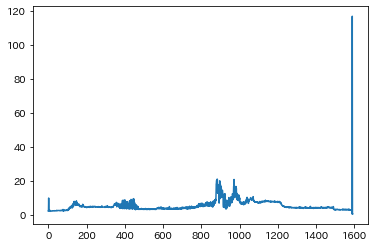

In [5]:
plt.plot(df.loc[:,['0.acc_rms(m/s2)']])
plt.show()

このように書くと，x軸はデータがある行数，y軸はデータにある値がプロットされます．x軸を経過時間にしたいときは，次のように変更します．ついでにx軸のラベル，y軸のラベルを変更し，凡例も追加します．

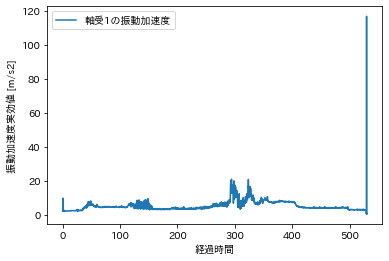

In [19]:
# データをプロット
# plt.plot(x軸データ，y軸データ, label=ラベル名) 
plt.plot(df.loc[:,['Elapsed time(hours)']], df.loc[:,['0.acc_rms(m/s2)']], label="軸受1の振動加速度")

# x軸のラベルを設定
# plt.xlabel(x軸のラベル名)
plt.xlabel("経過時間")

# y軸のラベルを設定
# plt.ylabel(y軸のラベル名)
plt.ylabel("振動加速度実効値 [m/s2]")

# 凡例を表示する
plt.legend()

# グラフを出力
plt.show()

これ以外にもたくさんのオプションがあり，画像のサイズを変更する，線の色を変更する，太さを変更するなどできます．

### 複数の種類のデータを一つのグラフに表示
データには軸受1以外にも軸受2，軸受3のデータがあります．そこで次に，三つのデータ（軸受No.1，No.2，No.3の振動加速度）をグラフに出力します．

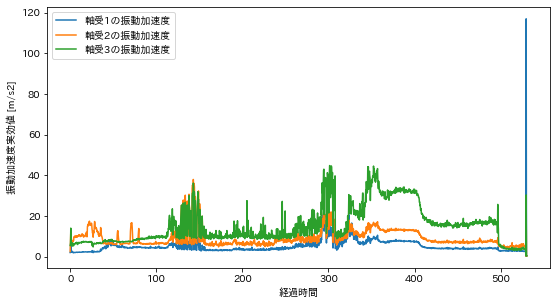

In [7]:
fig = plt.figure(figsize=(9, 4.8))
ax = fig.add_subplot(111, xlabel="経過時間", ylabel='振動加速度実効値 [m/s2]')
ax.plot(df['Elapsed time(hours)'],df['0.acc_rms(m/s2)'], label="軸受1の振動加速度")
ax.plot(df['Elapsed time(hours)'],df['1.acc_rms(m/s2)'], label="軸受2の振動加速度")
ax.plot(df['Elapsed time(hours)'],df['2.acc_rms(m/s2)'], label="軸受3の振動加速度")
ax.legend()
fig.show()

### Q1: 他のデータについてもグラフ表示をしてみましょう．
**三種類の振動速度（軸受No.1,No.2,No.3）**を図示してみてください．

In [ ]:
fig = plt.figure(figsize=(9, 4.8))
ax = fig.add_subplot(111, xlabel="経過時間", ylabel='振動速度実効値 [mm/s]')
ax.plot() # ここに内容を埋める
ax.legend()
fig.show()

### 「緊急度」判定のグラフ表示
緊急度 (0.alert_lvl, 1.alert_lvl, 2.alert_lvl)をグラフで表示します．

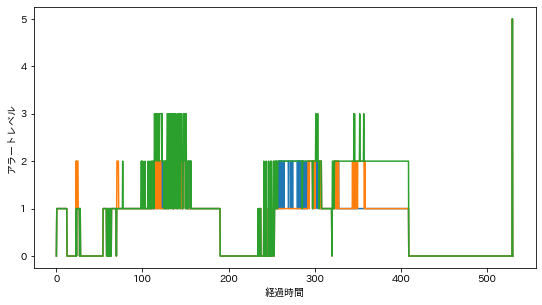

In [8]:
fig2 = plt.figure(figsize=(9, 4.8))
bx = fig2.add_subplot(111, xlabel="経過時間", ylabel='アラートレベル')
bx.plot(df['Elapsed time(hours)'],df['0.alert_lvl'])
bx.plot(df['Elapsed time(hours)'],df['1.alert_lvl'])
bx.plot(df['Elapsed time(hours)'],df['2.alert_lvl'])
fig2.show()

# データ分析
振動加速度の値から緊急度を判定できるかどうかについて，推測を行います．入力は振動加速度 (acc_rms(m/s2)) の値，出力は緊急度(alert_lvl)になります．
まずは，データ分析に関するライブラリを読み込みます．

In [9]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

データを訓練データとテストデータに分割します．ランダムに分けます．

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['1.acc_rms(m/s2)']], df['1.alert_lvl'], random_state=0)

ここでは機械学習の方法の一つであるパーセプトロンを用いて，データを推定します．

In [47]:
ppt = Perceptron()
ppt.fit(X_train.values, Y_train.values)
X_test_values = X_test.sort_index().values
Y_pred = pd.DataFrame(ppt.predict(X_test_values), index=Y_test.index, columns=['1.alert_lvl_pred'])
Y_result = pd.merge(Y_pred, Y_test, left_index=True, right_index=True)

うまくデータが推測できているかどうかを確かめるために，評価を行います．

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_result['1.alert_lvl'], Y_result['1.alert_lvl_pred'])
rmse = np.sqrt(mean_squared_error(Y_result['1.alert_lvl'], Y_result['1.alert_lvl_pred']))
test_score = ppt.score(X_test, Y_test)
train_score = ppt.score(X_train, Y_train)
coef = ppt.coef_[0]
intercept = ppt.intercept_
print("MAE = %.3f,  RMSE = %.3f,  test_score = %.3f, train_score = %.3f" % (mae, rmse, test_score, train_score))
print("Coef =", coef)
print("Intercept =", intercept)

MAE = 0.528,  RMSE = 0.760,  test_score = 0.497, train_score = 0.577
Coef = [-12.40712787]
Intercept = [  87.   11. -333.  -24.]


テストデータを使って，実際のデータとその予測値，実際の緊急度を図示します．

<bound method Figure.show of <Figure size 648x345.6 with 2 Axes>>

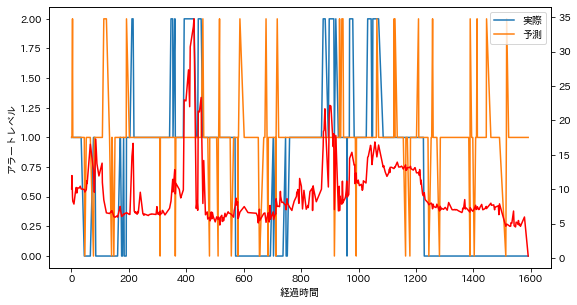

In [43]:
fig3 = plt.figure(figsize=(9, 4.8))
cx = fig3.add_subplot(111, xlabel="経過時間", ylabel='アラートレベル')
cx.plot(Y_result['1.alert_lvl'].sort_index(), label="実際")
cx.plot(Y_result['1.alert_lvl_pred'].sort_index(), label="予測")
cx2 = cx.twinx()
cx2.plot(X_test.sort_index(), label="実際のデータ", color='red')
cx.legend()
fig3.show

混同行列で，どれくらい正しく緊急度を当てることができたかを確かめます．

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[ 12 126  10]
 [ 11 185  11]
 [  0  42   1]]
